In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path="C:/Users/Artem/Documents/goto hack/"
dfout = pd.read_excel(path + "qiwi_users_money_out_data.xlsx")
dfin = pd.read_excel(path + "qiwi_users_money_in_data.xlsx")
dfu = pd.read_excel(path + "qiwi_users_profile_data.xlsx")

In [19]:
dfout['type']='outcome'

In [20]:
dfin['type']='income'

In [26]:
dfinout=pd.concat([dfin,dfout])

In [24]:
len(df)

297231

In [27]:
df

,category,date_month,txn_count,payment,user_id,type
0,QIWI,2014-02,1,70,2,income
1,QIWI,2016-03,1,200,2,income
2,QIWI,2016-07,2,1700,2,income
3,Банки,2014-01,1,50,2,income
4,Банки,2014-03,1,700,2,income


In [47]:
df=pd.merge(dfinout,dfu,on='user_id')

In [57]:
df=df.fillna('Нет')
dfu=dfu.fillna('Нет')

In [51]:
df.to_csv('all_data.csv',index=None,sep=';')

In [92]:
df['tran_year'] = df.date_month.str.split('-').str.get(0).astype(int)
df['tran_month'] = df.date_month.str.split('-').str.get(1).astype(int)

In [110]:
df.head(5)

,category,date_month,txn_count,payment,user_id,type,sex,university,faculty,graduation_year,tran_year,tran_month,graduated_ago
0,QIWI,2014-02,1,70,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2014,2,-2
1,QIWI,2016-03,1,200,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2016,3,0
2,QIWI,2016-07,2,1700,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2016,7,0
3,Банки,2014-01,1,50,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2014,1,-2
4,Банки,2014-03,1,700,2,income,Муж,ТвГТУ,Управления и социальных коммуникаций (Гуманита...,2016,2014,3,-2


C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2037.24511686
4579.365678457187


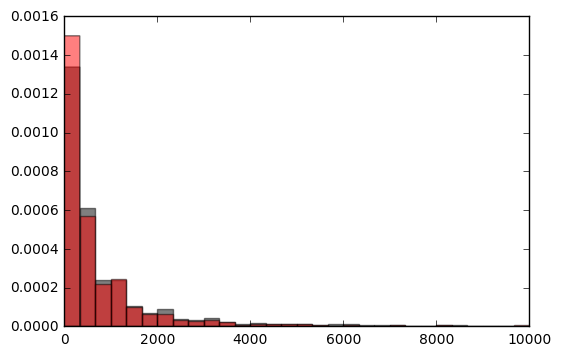

In [187]:
sub_ser1 = df[df['graduated_ago']==-2][df['type']=='outcome'].payment
print(sum(sub_ser)/len(sub_ser))
print(np.std(sub_ser))
sub_ser2 = df[df['graduated_ago']==2][df['type']=='outcome'].payment
plt.hist(sub_ser2,30,range=[0,10000],alpha=0.5,normed=True,color='Black')
plt.hist(sub_ser1,30,range=[0,10000],alpha=0.5,normed=True,color='Red')
plt.show()

In [337]:
#sub_df.iloc[1,0]
def get_row(sub_df):
    small_dic={}
    for i in range(len(sub_df)):
        category = sub_df.iloc[i][0]
        if category in small_dic:
            small_dic[category] = small_dic[category] +  sub_df.iloc[i][3]#3 means payment
        else:
            small_dic[category] = sub_df.iloc[i][3]
        
    return small_dic

In [375]:
big_dic = {}
for i in range(1,15113+1):
    if i%1000==0:
        print(i)
    str_key=i
    big_dic[str_key] = get_row(df[df['user_id']==i])

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [378]:
df_rost = pd.DataFrame.from_dict(big_dic)
df_rost=df_rost.fillna(0)
df_rost=df_rost.transpose()
df_rost

,IP-телефония,MCMS,MLM,QIWI,QIWI Казахстан,QVC,QVP,QVV,Sim-карты для туристов,VPP,...,Страхование,Такси,Телевидение,Терминалы и отделения партнеров QIWI,Транспортные карты,Туристический продукт,Файлообмен,Форекс,Хостинг,Электронные деньги
1,0.0,5800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1970.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,290.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,4820.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,690.0
7,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,6000.0,0.0,0.0
8,0.0,0.0,0.0,14920.0,0.0,4150.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1050.0,0.0,0.0,0.0,0.0,0.0,1400.0
9,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0


In [381]:
plt.plot(df_rost[])
plt.show()

TypeError: len() of unsized object

In [385]:
df_rost.head()

,IP-телефония,MCMS,MLM,QIWI,QIWI Казахстан,QVC,QVP,QVV,Sim-карты для туристов,VPP,...,Страхование,Такси,Телевидение,Терминалы и отделения партнеров QIWI,Транспортные карты,Туристический продукт,Файлообмен,Форекс,Хостинг,Электронные деньги
1,0.0,5800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1970.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,290.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
